# Parameter estimation and hypothesis testing

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sns.set()

## From Bayes Theorem to Bayesian Inference

Let's say that we flip a biased coin several times and we want to estimate the probability of heads from the number of heads we saw. Statistical intuition tells us that our best estimate of $p(heads)=$ number of heads divided by total number of flips.

However, 

1. It doesn't tell us how certain we can be of that estimate and
2. This type of intuition doesn't extend to even slightly more complex examples.

Bayesian inference helps us here. We can calculate the probability of a particular $p(H)$ given data $D$ by setting $A$ in Bayes Theorem equal to $p$ and $B$ equal to $D$.


$$P(p|D) = \frac{P(D|p)P(p)}{P(D)} $$



* Explain the above and why we don't currently need to consider $P(D)$ to get

$$P(p|D) \propto P(D|p)P(p) $$

* Discuss & define _prior_, _likelihood_ and _posterior_. 
* Essential: we get the whole distribution of $P(p|D)$, not merely a point estimate plus errors bars.
* Show analytic solution for posterior when flipping coins.
* Now let's generate some coin flips and try to estimate $p(H)$. **Note:** $0\leq p\leq 1$.

In [2]:
def plot_posterior(p=0.6, N=0):
    """Plot the posterior given a uniform prior; Bernoulli trials
    with probability p; sample size N"""
    np.random.seed(42)
    # Flip coins 
    n_successes = np.random.binomial(N, p)
    # X-axis for PDF
    x = np.linspace(0, 1, 100)
    #prior
    prior = 1
    posterior = x**n_successes*(1-x)**(N-n_successes)*prior
    posterior /= np.max(posterior)  # so that peak always at 1
    plt.plot(x, posterior)
    plt.show()

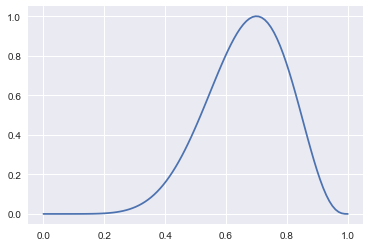

In [12]:
plot_posterior(N=10)

* Now use the great ipywidget interact to check out the posterior as you generate more and more data (you can also vary $p$):

In [25]:
interact(plot_posterior, p=(0, 1, 0.01), N=(0, 1500));

Things to note and to discuss as a group

* as you generate more and more data, your posterior gets narrower, i.e. you get more and more certain of your estimate.
* you need more data to be certain of your estimate when $p=0.5$, as opposed to when $p=0$ or $p=1$. 

### Other priors

But wait! We've had to specify a prior. Discuss specification of priors. Motivate Jeffries prior and show equation for it. 

### Hands-on

* Create an interactive plot like the one above, except that it has two posteriors on it: one for the uniform prior, another for the Jeffries prior.

In [5]:
# Solution
def plot_posteriors(p=0.6, N=0):
    np.random.seed(42)
    n_successes = np.random.binomial(N, p)
    x = np.linspace(0.01, 0.99, 100)
    posterior1 = x**n_successes*(1-x)**(N-n_successes)  # w/ uniform prior
    posterior1 /= np.max(posterior1)  # so that peak always at 1
    plt.plot(x, posterior1, label='Uniform prior')
    jp = np.sqrt(x*(1-x))**(-1)  # Jeffreys prior
    posterior2 = posterior1*jp  # w/ Jeffreys prior
    posterior2 /= np.max(posterior2)  # so that peak always at 1 (not quite correct to do; see below)
    plt.plot(x, posterior2, label='Jeffreys prior')
    plt.legend()
    plt.show()

In [6]:
interact(plot_posteriors, p=(0, 1, 0.01), N=(0, 100));

**Question:** What happens to the posteriors as you generate more and more data?

## Parameter estimation II: the mean of a population



### Hands-on

In this exercise, you'll calculate the  posterior mean beak depth of Galapagos finches. To do so, you'll assume that you know the population variance. 
[I'll take them through the equations and the pseudo-code of how to do this]

Specify prior (uniform from 0 to $10^5$ <--- motivate):

In [122]:
x = np.linspace(0,10**3, 10**4)
prior = 1/10**3

Posterior:
    
$$P(\mu|D) = \frac{1}{(2\pi^2)^{n/2}}\text{exp}(\frac{1}{2\sigma^2}\sum(x_i-\mu)^2)$$    

It follows (show some math to get there?) that $$P(\mu|D)= \mathcal{N}(\overline{x},\sigma/\sqrt{n})$$

Then generate from the Gaussian distribution to plot a histogram of means:

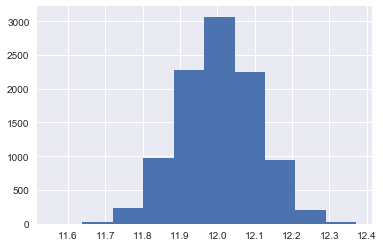

In [136]:
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
lengths = df_12.blength
means = np.random.normal(np.mean(lengths), np.std(lengths)/np.sqrt(len(lengths)), 10**4)
plt.hist(means);

## Bayesian Hypothesis testing

### Instruction: A/B tests on click through rates

Assume we have a website and want to redesign the layout (_A_) and test whether the new layout (_B_) results in a higher click through rate. When people come to our website we randomly show them layout _A_ or _B_ and see how many people click through for each. First let's generate the data we need:

In [94]:
# click-through rates
p_a = 0.15
p_b = 0.16
N = 150
n_successes_a = np.random.binomial(N,p_a)
n_successes_a

29

Choose uniform prior and plot posterior:

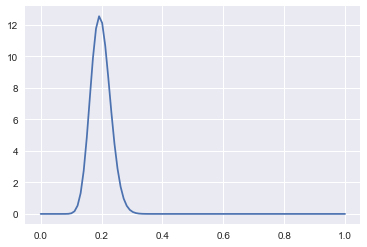

In [95]:
x = np.linspace(0, 1, 100)
#prior
prior = 1
posterior_a = x**n_successes_a*(1-x)**(N-n_successes_a)*prior
posterior_a /= np.sum(posterior_a)/100  # so that peak always at 1
plt.plot(x, posterior_a);

**Note**: this is the same as the coin flip.

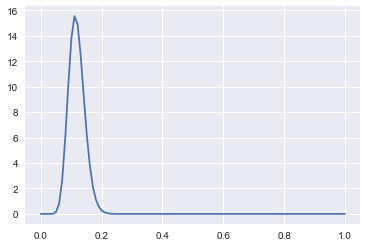

In [96]:
n_successes_b = np.random.binomial(N,p_b)
n_successes_b
posterior_b = x**n_successes_b*(1-x)**(N-n_successes_b)*prior
posterior_b /= np.sum(posterior_b)/100  # so that peak always at 1
plt.plot(x, posterior_b);

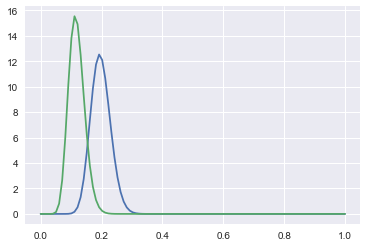

In [97]:
plt.plot(x, posterior_a);
plt.plot(x, posterior_b);

### Difference between _A_ and _B_

What about $d = p_A - p_B$?

In [100]:
_ = np.convolve(posterior_a, np.flip(posterior_b, 0))

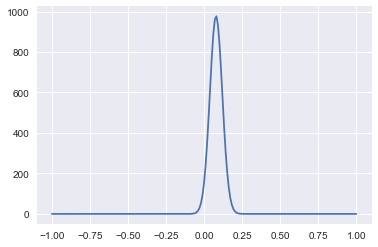

In [101]:
plt.plot(np.linspace(-1, 1, 199), _);

### Hands-on: beak shape difference over 50 years in Galapagos finches

**Task**: Determine whether the mean beak shape of the Galapogas finches changed betweeh 1975 and 2012. To do so, assume that both populations are normally distributed with population variance equal to sample variance.

**Method**: Look at the distribution of $\mu_X - \mu_Y$ and combine the methods above of
* calculating the mean beak length and
* calculating the posterior of $d = p_A - p_B$.